<a href="https://colab.research.google.com/github/BrunoNunesSKT/Projetos_SoulCode/blob/main/Projeto_Airbnb_S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE DE DADOS - AIRBNB AMSTERDAM**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Período: Semana 6

Professor: Franciane Rodrigues

Aluno: Bruno Nunes

## **Pergunta de negócio**

Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

## **Legenda de Dados**

`realSum`: preço total  
`room_type`: tipo de quarto oferecido  
`room_shared`: se o quarto é compartilhado ou não   
`room_private`: se o quarto é privativo ou não   
`person_capacity`: número máximo de pessoas permitidas na propriedade  
`host_is_superhost`: se o host é ou não um superhost (anfitriões mais hospitaleiros)  
`multi`: tem vários quartos ou não   
`biz`: seja para uso comercial ou familiar  
`cleanliness_rating`: Classificação de limpeza  
`guest_satisfaction_overall`: satisfação geral do hóspede   
`bedrooms`: número de quartos (0 para estúdios)  
`dist`: a distância do centro da cidade   
`metro_dist`: a distância da estação de metrô mais próxima   
`lng`: Longitude   
`lat`: Latitude  

## **Instalando e importando bibliotecas**

In [ ]:
# Instalando a lib Pandera
!pip install pandera
!pip install gcsfs
# As demais libs utilizadas já estão instaladas nativamente no Colab

In [ ]:
# Importando as libs
import pandas as pd
import numpy as np
import os
import pandera as pa
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import storage

## **Extração**

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = 'REMOVIDO'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projetos-soulcode')
bucket.blob('airbnb_bruto.csv')
path = 'REMOVIDO'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path, sep=',')

## **Pré-Análise**

In [ ]:
# Visualizando importação do DB (A principio somente as 5 primeiras linhas)
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [ ]:
# Verificando possiveis inconsistências

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
# Criando Backup do DB sem alterações
dfbackup = df.copy()

## **Transformação**

In [ ]:
# Removendo atributos que não serão analisados a principio

df.drop(['rest_index_norm',
         'rest_index',
         'attr_index_norm',
         'attr_index',
         'multi',
         'biz'],axis=1, inplace=True)

In [ ]:
# Traduzindo os atributos (EN - PT)
df.rename(columns={'room_type':'tipo_quarto',
                   'room_shared':'compartilhado',
                   'room_private': 'privado',
                   'person_capacity':'capacidade',
                   'bedrooms':'quartos',
                   'cleanliness_rating':'nota_limpeza',
                   'host_is_superhost':'superhost',
                   'guest_satisfaction_overall':'satisfacao',
                   'dist':'distancia_centro',
                   'metro_dist':'distancia_metro',
                   'realSum':'preco_total',
                   'lat':'latitude',
                   'lng':'longitude',
                   'Unnamed: 0': 'id'},
                    inplace = True
          )

In [ ]:
# Traduzindo os dados
traducao_tipo_quarto = {
    'Entire home/apt': 'Casa inteira/Apt',
    'Shared room': 'Quarto compartilhado',
    'Private room': 'Quarto privado'
}

df['tipo_quarto'].replace(traducao_tipo_quarto, inplace = True)

In [ ]:
# Verificando se todos ID's são unicos
df.id.is_unique

True

In [ ]:
# Verificando dados nulos, ausente etc 1
df.isna().sum()

id                  0
preco_total         0
tipo_quarto         0
compartilhado       0
privado             0
capacidade          0
superhost           0
nota_limpeza        0
satisfacao          0
quartos             0
distancia_centro    0
distancia_metro     0
longitude           0
latitude            0
dtype: int64

In [ ]:
# Verificando dados nulos, ausente etc 2
df.isnull().sum()

id                  0
preco_total         0
tipo_quarto         0
compartilhado       0
privado             0
capacidade          0
superhost           0
nota_limpeza        0
satisfacao          0
quartos             0
distancia_centro    0
distancia_metro     0
longitude           0
latitude            0
dtype: int64

In [ ]:
# Verificando alterações
df.head()

,id,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,longitude,latitude
0,0,194.033698,Quarto privado,False,True,2.0,False,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772
1,1,344.245776,Quarto privado,False,True,4.0,False,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432
2,2,264.101422,Quarto privado,False,True,2.0,False,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103
3,3,433.529398,Quarto privado,False,True,4.0,False,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663
4,4,485.552926,Quarto privado,False,True,2.0,True,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508


In [ ]:
# Removendo os atributos "compartilhado" e "privado" pois se mostram redundantes ao atributo "tipo_quarto"
df.drop('compartilhado', axis=1,inplace=True)
df.drop('privado', axis=1,inplace=True)

In [ ]:
# Removendo os atributos "latitude" e "longitude" pois não será utilizado para análise
df.drop('latitude', axis=1,inplace=True)
df.drop('longitude', axis=1,inplace=True)

In [ ]:
# Checando tipos dos dados em processo de transformação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1103 non-null   int64  
 1   preco_total       1103 non-null   float64
 2   tipo_quarto       1103 non-null   object 
 3   capacidade        1103 non-null   float64
 4   superhost         1103 non-null   bool   
 5   nota_limpeza      1103 non-null   float64
 6   satisfacao        1103 non-null   float64
 7   quartos           1103 non-null   int64  
 8   distancia_centro  1103 non-null   float64
 9   distancia_metro   1103 non-null   float64
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 78.8+ KB


In [ ]:
# Transformando o atributo ID (identificador) para String
df['id'] = df['id'].astype(str)

In [ ]:
# Checando alteração do tipo do atributo ID
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1103 non-null   object 
 1   preco_total       1103 non-null   float64
 2   tipo_quarto       1103 non-null   object 
 3   capacidade        1103 non-null   float64
 4   superhost         1103 non-null   bool   
 5   nota_limpeza      1103 non-null   float64
 6   satisfacao        1103 non-null   float64
 7   quartos           1103 non-null   int64  
 8   distancia_centro  1103 non-null   float64
 9   distancia_metro   1103 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 78.8+ KB


In [ ]:
filtro_comp = (df.tipo_quarto == 'Quarto compartilhado')
filtro_priv = (df.tipo_quarto == 'Quarto privado')
filtro_casa_apt = (df.tipo_quarto == 'Casa inteira/Apt')
filtro_zero = df.quartos.isin([0])

dfzero = df.loc[filtro_priv & filtro_zero]
dfzero1 = df.loc[filtro_casa_apt & filtro_zero]

print(dfzero.groupby(['quartos']).size().sort_values(ascending=False))
print(dfzero1.groupby(['quartos']).size().sort_values(ascending=False))

# Quarto privado = 54 quartos zerados
# Casa inteira = 29 quartos zerados
# Após pesquisas, foi encontrado que 0 quartos são Estudios

quartos
0    54
dtype: int64
quartos
0    29
dtype: int64


In [ ]:
# Renoameando os quartos com 0 quartos para Estudio

for i, valor in enumerate(df['quartos']):
    if valor == 0:
        df.loc[i, 'tipo_quarto'] = df.loc[i, 'tipo_quarto'].replace("Quarto privado", "Estudio")
    else:
        pass

for i, valor in enumerate(df['quartos']):
    if valor == 0:
        df.loc[i, 'tipo_quarto'] = df.loc[i, 'tipo_quarto'].replace("Casa inteira/Apt", "Estudio")
    else:
        pass


In [ ]:
# Contagem de tipos de quarto
df['tipo_quarto'].value_counts()

Casa inteira/Apt        509
Quarto privado          505
Estudio                  83
Quarto compartilhado      6
Name: tipo_quarto, dtype: int64

## **Qualidade dos Dados**

In [ ]:
# Visualizando a integridade do DB
df.sample(10)

,id,preco_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro
313,313,299.721135,Quarto privado,2.0,False,10.0,100.0,1,3.812821,1.110847
627,627,528.437185,Quarto privado,2.0,False,4.0,47.0,1,3.809663,0.417682
406,406,280.036557,Quarto privado,2.0,True,10.0,96.0,1,4.593248,0.723128
65,65,330.419703,Casa inteira/Apt,2.0,False,10.0,98.0,1,2.564052,1.248153
306,306,555.386310,Quarto privado,3.0,True,10.0,96.0,1,0.397129,0.424970
343,343,268.085206,Estudio,2.0,True,10.0,99.0,0,8.396194,3.349574
741,741,300.892836,Quarto privado,2.0,False,10.0,91.0,1,1.367826,1.478442
870,870,258.008577,Quarto privado,2.0,True,10.0,98.0,1,1.885696,0.289653
816,816,504.065803,Quarto privado,4.0,False,10.0,91.0,1,1.423924,0.108940
447,447,393.457221,Quarto privado,2.0,True,10.0,100.0,1,7.325871,3.513990


In [ ]:
# Verificando tipo de dados do dataframe para validação schema
df.dtypes

id                   object
preco_total         float64
tipo_quarto          object
capacidade          float64
superhost              bool
nota_limpeza        float64
satisfacao          float64
quartos               int64
distancia_centro    float64
distancia_metro     float64
dtype: object

In [ ]:
# Validação Schema
schema = pa.DataFrameSchema({'id': pa.Column(pa.String),
                            'preco_total': pa.Column(pa.Float),
                            'tipo_quarto': pa.Column(pa.String),
                            'capacidade': pa.Column(pa.Float),
                            'superhost': pa.Column(pa.Bool),
                            'nota_limpeza': pa.Column(pa.Float),
                            'satisfacao': pa.Column(pa.Float),
                            'quartos': pa.Column(pa.Int),
                            'distancia_centro': pa.Column(pa.Float),
                            'distancia_metro': pa.Column(pa.Float)
                            })

# Validando o DataFrame
schema.validate(df)

,id,preco_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro
0,0,194.033698,Quarto privado,2.0,False,10.0,93.0,1,5.022964,2.539380
1,1,344.245776,Quarto privado,4.0,False,8.0,85.0,1,0.488389,0.239404
2,2,264.101422,Quarto privado,2.0,False,9.0,87.0,1,5.748312,3.651621
3,3,433.529398,Quarto privado,4.0,False,9.0,90.0,2,0.384862,0.439876
4,4,485.552926,Quarto privado,2.0,True,10.0,98.0,1,0.544738,0.318693
...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Casa inteira/Apt,2.0,False,10.0,100.0,1,2.375833,1.436054
1099,1099,233.637194,Quarto privado,2.0,False,10.0,90.0,1,4.719736,0.322263
1100,1100,317.062311,Quarto privado,2.0,False,10.0,92.0,1,0.598355,0.751993
1101,1101,1812.855904,Casa inteira/Apt,4.0,False,8.0,84.0,5,1.943020,0.388532


In [ ]:
# Criando Backup do DB já tratado e verificado
dfbackup2 = df.copy()

## **Carregamento**

In [ ]:
# Google Cloud - Utilizar se for o rotulo padrão (Salvando no Cloud com o nome Airbnb_Tratado)
df.to_csv('gs://projetos-soulcode/Tratado/airbnb_tratado.csv',index=False)

# **Análises**

## **Medidas Descritivas**

In [ ]:
# Verificando as medidas do DataFrame
df.describe()

,preco_total,capacidade,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,545.020526,2.792384,9.461469,94.362647,1.282865,2.841621,1.089439
std,416.974314,1.044151,0.798201,6.089691,0.740178,2.123245,0.836546
min,128.887118,2.000000,4.000000,20.000000,0.000000,0.015059,0.036530
25%,309.797764,2.000000,9.000000,92.000000,1.000000,1.302058,0.462983
50%,430.248635,2.000000,10.000000,96.000000,1.000000,2.341366,0.856010
75%,657.324303,4.000000,10.000000,98.000000,2.000000,3.648138,1.510629
max,7782.907225,6.000000,10.000000,100.000000,5.000000,11.187100,4.411915


In [ ]:
# Medidas Descritivas dos Superhosts
filtro_sh = (df.superhost == True)
df_sh = df.loc[filtro_sh]
df_sh.describe()

,preco_total,capacidade,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,504.140530,2.643963,9.851393,97.195046,1.210526,2.899304,1.141513
std,340.339243,0.996976,0.381509,2.435957,0.599389,2.127966,0.876304
min,165.678532,2.000000,8.000000,80.000000,0.000000,0.122820,0.036530
25%,288.707145,2.000000,10.000000,96.000000,1.000000,1.339418,0.490977
50%,368.851499,2.000000,10.000000,98.000000,1.000000,2.262392,0.852993
75%,610.456260,4.000000,10.000000,99.000000,1.000000,3.797796,1.576839
max,2771.307384,6.000000,10.000000,100.000000,3.000000,10.853493,4.030014


## **Filtros**

In [ ]:
# Filtro por tipo de quarto
filtro_comp = (df.tipo_quarto == 'Quarto compartilhado')
filtro_priv = (df.tipo_quarto == 'Quarto privado')
filtro_casa_apt = (df.tipo_quarto == 'Casa inteira/Apt')
filtro_estudio = (df.tipo_quarto == 'Estudio')

In [ ]:
# Novos dataframes com filtros
df_comp = df.loc[filtro_comp]
df_priv = df.loc[filtro_priv]
df_casa_apt = df.loc[filtro_casa_apt]
df_estudio = df.loc[filtro_estudio]

## **Gráficos**

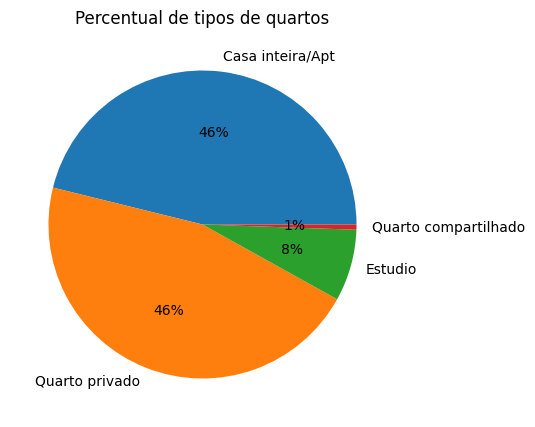

In [ ]:
# Gráfico de setores (Verificar percentual de tipos de quarto)

df.groupby(['tipo_quarto'],dropna=False).size().sort_values(ascending=False).plot(kind='pie',
                                                                                  figsize=(5, 5),
                                                                                  autopct='%1.0f%%')
plt.title('Percentual de tipos de quartos', loc='center')
plt.show()

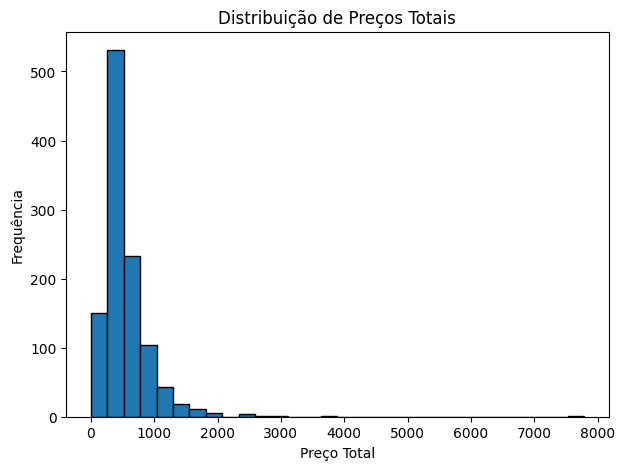

In [ ]:
# Gráfico Histograma (Verificar a distribuição dos preços dos alugueis)

plt.figure(figsize=(7, 5))
plt.hist(df["preco_total"], bins=30, edgecolor="black", range=(0, 7783))
plt.xlabel("Preço Total")
plt.ylabel("Frequência")
plt.title("Distribuição de Preços Totais")
plt.show()

In [ ]:
# Média dos preços do aluguel

print(f'A média dos preços do total de alugueis é: €{df["preco_total"].mean():.2f} | R$2902.73')
print(f'A média dos preços dos Quartos Compartilhados é: €{df_comp["preco_total"].mean():.2f} / R$1496.42')
print(f'A média dos preços dos Quartos Privados é: €{df_priv["preco_total"].mean():.2f} / R$1950.99')
print(f'A média dos preços das Casas Inteiras ou Apt é: €{df_casa_apt["preco_total"].mean():.2f} / R$3972.13')
print(f'A média dos preços dos Estudios é: €{df_estudio["preco_total"].mean():.2f} / R$2237.31')

A média dos preços do total de alugueis é: €545.02 | R$2902.73
A média dos preços dos Quartos Compartilhados é: €280.97 / R$1496.42
A média dos preços dos Quartos Privados é: €366.32 / R$1950.99
A média dos preços das Casas Inteiras ou Apt é: €745.81 / R$3972.13
A média dos preços dos Estudios é: €420.08 / R$2237.31


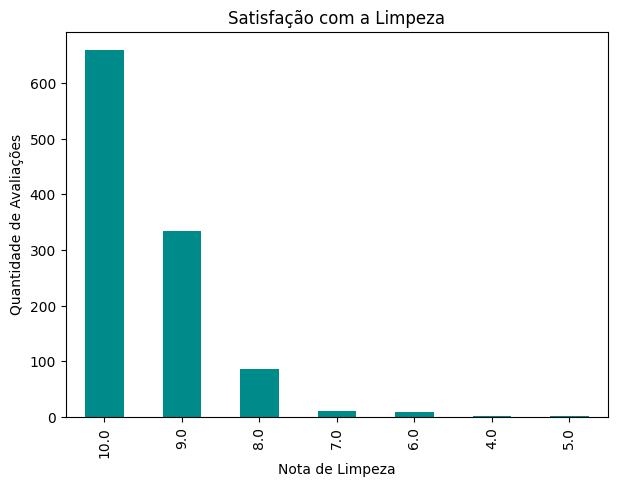

In [ ]:
# Gráfico de Barra (Verificar a distribuição dos niveis de satisfação com a limpeza)

df.groupby('nota_limpeza').size().sort_values(ascending=False).plot.bar(figsize=(7,5), color=['DarkCyan'])
plt.xlabel('Nota de Limpeza')
plt.ylabel('Quantidade de Avaliações')
plt.title('Satisfação com a Limpeza')
plt.show()

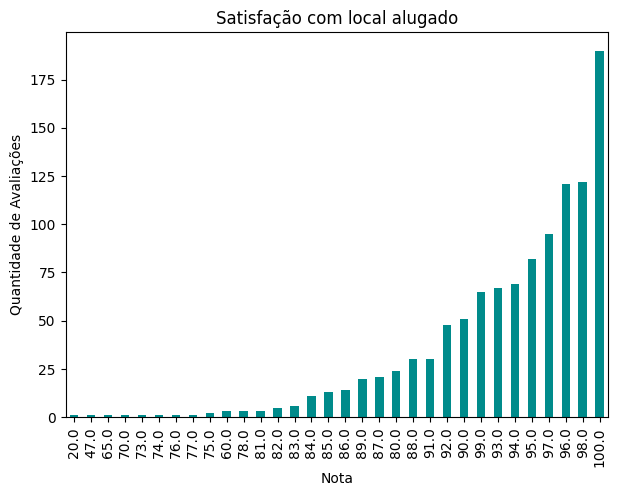

In [ ]:
# Gráfico de Barra (Verificar a distribuição dos niveis de satisfação com o local)

df.groupby('satisfacao').size().sort_values(ascending=True).plot.bar(figsize=(7,5), color=['DarkCyan'])
plt.xlabel('Nota')
plt.ylabel('Quantidade de Avaliações')
plt.title('Satisfação com local alugado')
plt.show()

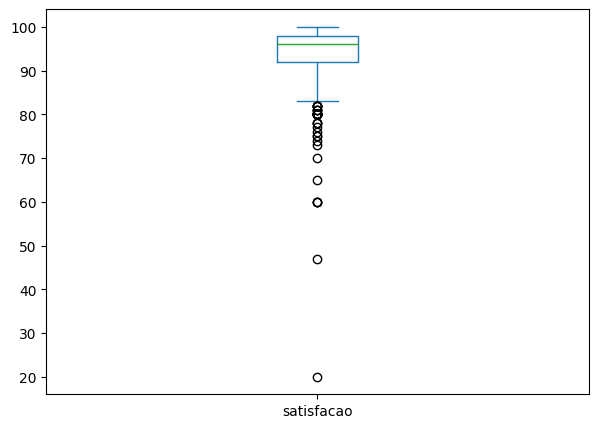

In [ ]:
# Gráfico de Caixa (Verificar limites de "normalidade" e possiveis outliers)

df.plot.box(column="satisfacao", figsize=(7, 5))
plt.show()

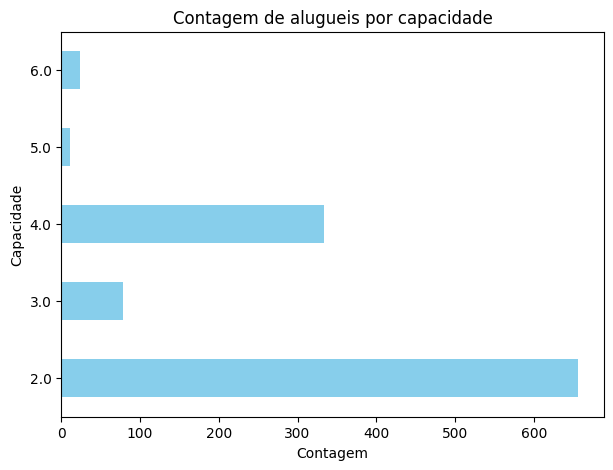

In [ ]:
df.groupby(['capacidade']).size().plot.barh(figsize=(7,5), color=['skyblue'])
plt.xlabel('Contagem')
plt.ylabel('Capacidade')
plt.title('Contagem de alugueis por capacidade')
plt.show()

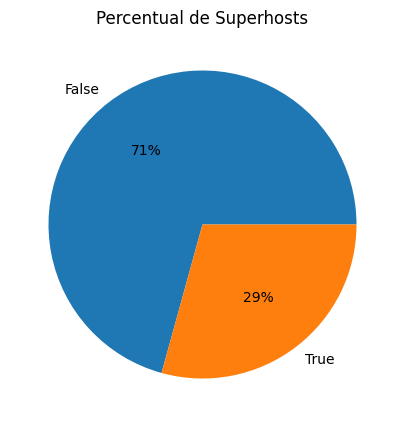

In [ ]:
# Gráfico de setores (Verificar o percentual de Superhosts)

df.groupby(['superhost'],dropna=False).size().sort_values(ascending=False).plot(kind='pie',
                                                                                  figsize=(5, 5),
                                                                                  autopct='%1.0f%%')
plt.title('Percentual de Superhosts', loc='center')
plt.show()

<ipython-input-135-8b82e909fe72>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


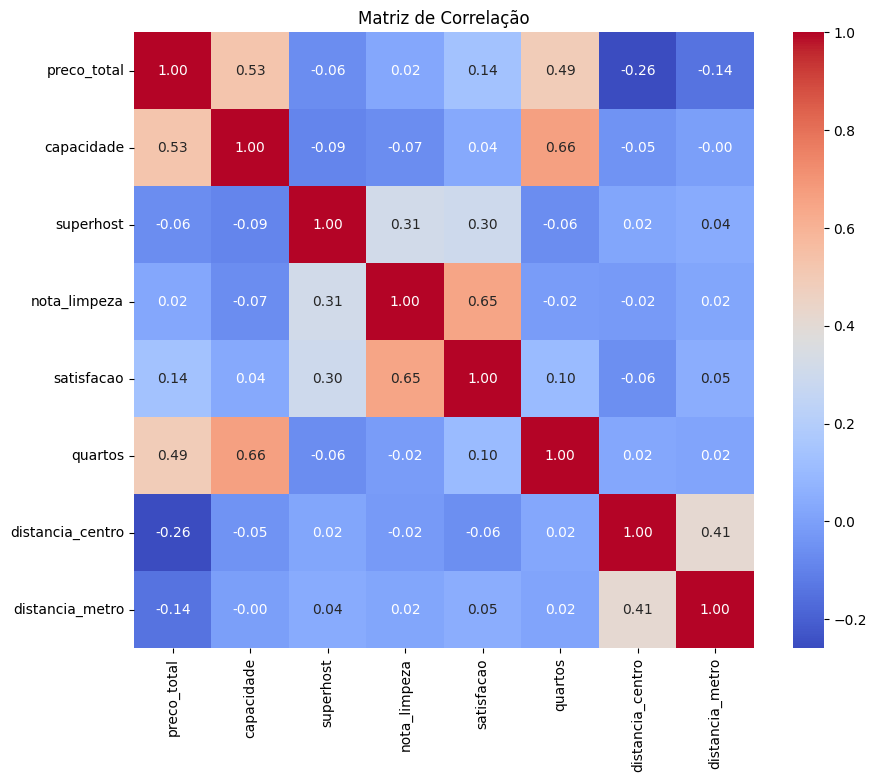

In [ ]:
# Mapa de Calor (Verificar possiveis correlações entre os atributos e seus respectivos dados)

'''
r = 0,9 a 1 (positivo ou negativo): correlação muito forte;
r = 0,7 a 09 (positivo ou negativo): correlação forte;
r = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
r = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
r = 0 a 0,3 (positivo ou negativo): não possui correlação.
'''

# Calculando a matriz de correlação
correlacao = df.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))  # Tamanho da figura
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")  # Plotar o heatmap
plt.title("Matriz de Correlação")  # Título do gráfico

# Exibir o gráfico
plt.show()


## **Conclusões**

### **Observaçês Gerais**

* A média de preços do Dataframe analisado é de €545.02 | R$2902.73 (Com desvio padrão de aproximadamente €416 para mais ou para menos).

* Os tipos de quartos mais alugados são Quarto Privado (46%) e Casa Inteira/Apartamento (46%).

* A média de preços dos tipos de quartos mais alugados são de €366 para Quartos Privados e €745 para Casas Inteiras/Apartamentos.

* 90% das avaliações de satisfação com a limpeza estão com notas entre 9 e 10. (Considerando notas de 0 a 10).

* Dos 1103 aluguéis analisados, apenas 2 avaliações de satisfação com local ficaram abaixo de 65%, sendo a maior parte das avaliações estando entre 83% e 100% de satisfação.

* 59% dos quartos/casas alugadas possuiam capacidade para 2 hospedes, seguido por quartos/casas com capacidade de 4 hospedes correspondente a 30%.

* Apenas 29% dos anfitriôes são Superhosts.

* Foi verificado possiveis correlações com atributos utilizados nesta analise, no entanto, as correlações são consideradas fracas ou que não possuem correlação.



## **Oportunidades**

* **Diversificação de tipos de quartos**: Com os quartos privados e casas inteiras/apartamentos sendo os tipos de quartos mais alugados, há uma oportunidade de diversificar a oferta de acomodações. Isso pode incluir a inclusão de outros tipos de quartos, como quartos compartilhados, suítes ou estúdios, para atrair diferentes tipos de viajantes.

* **Foco na qualidade da limpeza**: Com uma alta porcentagem de avaliações de satisfação com a limpeza entre 9 e 10, é uma oportunidade para enfatizar e destacar a qualidade da limpeza nas listagens. Isso pode ser uma vantagem competitiva ao atrair viajantes que valorizam a higiene e a limpeza dos espaços.

* **Melhoria da satisfação com o local**: Embora a maioria das avaliações de satisfação com o local esteja entre 83% e 100%, a identificação de duas avaliações abaixo de 65% pode indicar uma oportunidade de melhorar a satisfação geral dos hóspedes com a localização das propriedades. Isso pode ser alcançado fornecendo informações detalhadas sobre a localização, pontos de interesse nas proximidades e facilidades de transporte.

* **Foco em quartos para 2 hóspedes**: Considerando que 59% dos quartos/casas alugadas têm capacidade para 2 hóspedes, é uma oportunidade direcionar esforços de marketing e aprimorar a oferta para atender especificamente a essa demanda. Isso pode envolver a criação de pacotes ou descontos especiais para casais ou viajantes individuais.

* **Aumento do número de Superhosts**: Com apenas 29% dos anfitriões sendo Superhosts, há uma oportunidade de incentivar mais anfitriões a alcançar esse status. Isso pode ser feito por meio de programas de suporte e orientação, reconhecendo e destacando os benefícios de ser um Superhost. Ter um número maior de Superhosts pode melhorar a reputação geral do Airbnb em Amsterdam.

## **Ameaças**

* **Baixa satisfação em algumas avaliações de satisfação com o local**: Embora a maioria das avaliações esteja positiva, a identificação de algumas avaliações abaixo de 65% de satisfação com o local pode representar uma ameaça. Essas avaliações podem impactar a reputação do Airbnb e influenciar a decisão de potenciais hóspedes. É importante identificar e abordar as questões subjacentes que contribuíram para essas avaliações negativas.

* **Competição no mercado**: Com a presença de um grande número de anfitriões (apenas 29% dos quais são Superhosts), o mercado de aluguel de curta duração em Amsterdam pode ser altamente competitivo. Isso pode representar um desafio para atrair hóspedes e manter uma taxa de ocupação elevada.

* **Regulamentações e restrições locais**: É importante considerar as regulamentações e restrições locais que podem afetar a operação do Airbnb em Amsterdam. Mudanças nas leis ou restrições impostas pelas autoridades podem limitar o crescimento ou impor obrigações adicionais ao empreendimento.

**Conclusão**: Vão sobreviver os "hotéis" que alterarem seus modelos de negócios. Ou seja, os que captarem a evolução das necessidades, preferências e comportamentos do consumidor.